<h1><center>$\text{Problem Set 2: Milky Way Structure}$</center></h1>

Developed by Prof. Cara Battersby for the University of Connecticut PHYS4720/6720 Galaxies and the ISM Course. This workbook is adapted from a notebook on Milky Way Structure from Benne Holwerda at the University of Louisville for PHYS590. Some of the work from that repository was adapted from Vivienne Acquiviva, an Associate Professor in the Physics Department at the CUNY NYC College of Technology and at the CUNY Graduate Center.


---
##Instructions:

**BEFORE YOU BEGIN:**

1.   Navigate to "File" --> "Save a Copy in Drive"
2.   Rename file and put it somewhere you can find it again.

***Important Note:*** It is *not* enough to just rename the filename at the top, please follow the instructions above.


1. First, please save a copy of this notebook as instructed above.

2. This notebook contains 3 problems for 22 points total.

3. You may follow this notebook and submit your final product by sharing your completed colab notebook with me, or take the questions and do your own coding and submit a PDF of your plots and code, or TBD another method depending on feedback and suggestions!

**Your Name:** Kelcey Davis

**Names of Students you worked with:**

**What resources did you use for this problem set?:**

**How long did this problem set take? Please estimate for both the coding and written problems:**

## Problem 1 (5 pts) - Measuring Galactic Rotation based on our position within the Galaxy.

In class, we will derive that the orbital velocity as a function of Galactocentric Radius, V(R), is given by:

$V (R) = V_{\rm{max}} + V_0~sin(\ell)$

where $V_{\rm{max}}$ is the maximum orbital velocity along the line-of-sight at Galactic longitude, $\ell$, and $V_0$ is the circular velocity at the Sun's location (the Local Standard of Rest, LSR) at the Sun.

This expression enables us to measure the overall rotation speed of the Galaxy by observing spectra across a range of Galactic longitudes and measuring the maximum radial velocity of gas in each. 

Cool!

For the following, we will assume $R_\odot = 8.5$ kpc and $V_\odot = 210$ km/s for consistency, but note that currently accepted values are closer to $R_\odot = 8.15$ kpc and $V_\odot = 236$ km/s from Reid et al. (2019). 

We'll start with a series of measurements from the ESA-Haystack radio telescope (J. Koppen) from 24 March 2010, available here: https://portia.astrophysik.uni-kiel.de/~koeppen/Haystack/ 



In [2]:
#Some packages you'll probably want
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table
from astropy import units as u
#from google.colab import files
plt.style.use('default')

from pylab import *

In [3]:
# this is the data for students to use. Do not delete.
l = np.asarray([10.,20.,30.,40.,50.,60.,70.,80.,90.]) # in degrees
Vmax = np.asarray([150.,138.,120.,94.,73.,52.,33.,23.,17.]) # in km/s

Rsun = 8.5 #kpc
Vsun = 210  #km/s



Using these data, plot Vmax and V(R) as a function of R (R is on the x-axis). As usual, be sure to label your plot axes, units, etc.

In [5]:
def getVR(l, Vmax):
    """
    Calculates V(R) for a given l and Vmax at some radius R
    
    Parameters
    ---
    l:
    Vmax:
    
    Returns
    ---
    V
    """
    V0 = 210 #km/s
    VR = Vmax+V0*np.sin(l)
    return VR

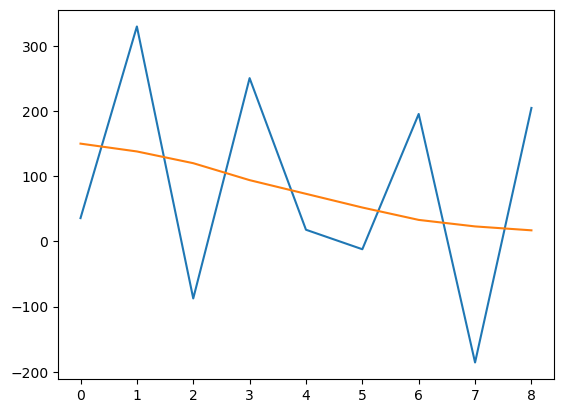

In [7]:
VR = getVR(l,Vmax)
plt.plot(VR)
plt.plot(Vmax)

## Problem 2 (8 pts total) - Galaxy Rotation as a function of Radius

We now read in a much larger data-set of Galactic rotation, also from ESA-Haystack radio telescope (J. Koppen) from 24 March 2010, available here: https://portia.astrophysik.uni-kiel.de/~koeppen/Haystack/. These data are in the problem set folder in the file entitled: 'GalaxyRT.csv' Compare the small and large datasets and answer the questions below.

### Problem 2a (3 pts): 

Plot V(R) as a function of R (x-axis) for both the small dataset (numbers in first code box) and the large dataset in the GalaxyRT.csv file. Do the two measures agree?

In [12]:
t = Table.read('GalaxyRT.csv', format='ascii.csv')
t2 = Table.read('Galaxy_GC.csv', format='ascii.csv')

In [16]:
t.keys()

['radius', 'velocity']

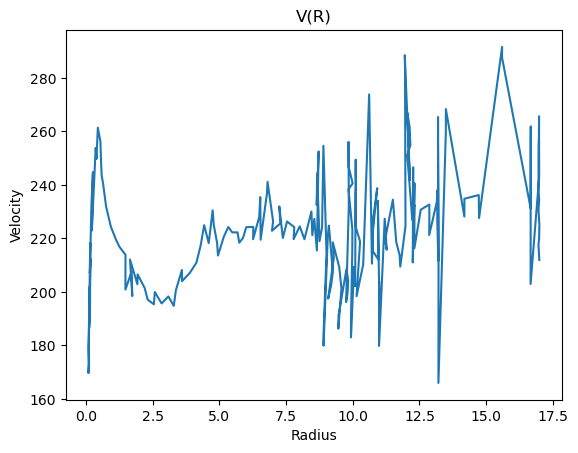

In [21]:
plt.plot(t['radius'], t['velocity']);
plt.xlabel('Radius')
plt.ylabel('Velocity')
plt.title('V(R)');




In [15]:
t2.keys()

['ID',
 'Name',
 'RA1',
 'RA2',
 'RA3',
 'Delta19',
 'Delta2',
 'Delta3',
 'l',
 'b',
 'R_Sun',
 'R_gc',
 'X',
 'Y',
 'Z']

In [23]:
t2

ID,Name,RA1,RA2,RA3,Delta19,Delta2,Delta3,l,b,R_Sun,R_gc,X,Y,Z
str9,str11,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64
NGC 104,47 Tuc,0,24,5.67,-72,4,52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1
NGC 288,--,0,52,45.24,-26,34,57.4,152.3,-89.38,8.9,12.0,-0.1,0.0,-8.9
NGC 362,--,1,3,14.26,-70,50,55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2
Whiting 1,--,2,2,57.0,-3,15,10.0,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3
NGC 1261,--,3,12,16.21,-55,12,58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9
Pal 1,--,3,33,20.04,79,34,51.8,130.06,19.03,11.1,17.2,-6.8,8.1,3.6
AM 1,E 1,3,55,2.3,-49,36,55.0,258.34,-48.47,123.3,124.6,-16.5,-80.1,-92.3
Eridanus,--,4,24,44.5,-21,11,13.0,218.1,-41.33,90.1,95.0,-53.2,-41.7,-59.5
Pal 2,--,4,46,5.91,31,22,53.4,170.53,-9.07,27.2,35.0,-26.4,4.4,-4.3


**Answer:** Your answer

### Problem 2b (1 pts): 

What is the average* rotation velocity of the Milky Way?

*Consider a few different measures of the "average"

In [ ]:
# Your code

**Answer:** Your answer


### Problem 2c (1 pt): 

How do you calculate an enclosed mass from these data? 

By comparing the gravitational and centripetal forces of a point mass with velocity V(R) at radius R, calculate the enclosed mass as a function of Galactocentric Radius. (This is an analytic expression and should not require coding.)








**Answer:** Your answer

### Problem 2d (3 pts): 

What is the implied enclosed *mass* of the Milky Way?

Estimate an approximate implied enclosed mass of the Milky Way using these data. 

In [ ]:
# Your code

**Answer:** Your answer


## Problem 3 (9 pts total) - Globular Clusters

Next we explore where the Milky Way's Globular Clusters and HII regions are on the sky. The positions of the Milky Way's Globular Clusters are in the Galaxy_GC.csv file and the HII regions are in the glimpseHII.csv file. 

We use the Globular Cluster data from here:
https://heasarc.gsfc.nasa.gov/w3browse/all/globclust.html
from Harris+ (1996) and the HII region data from GLIMPSE (Benjamin et al. 2003). (Refer to the heasarc website for more details on the GC table and units.)

In [ ]:
GC = Table.read('Galaxy_GC.csv', format='ascii.csv')
print(GC)

    ID     Name  RA1 RA2  RA3  Delta19 ...   b    R_Sun  R_gc   X     Y     Z  
--------- ------ --- --- ----- ------- ... ------ ----- ----- ----- ----- -----
  NGC 104 47 Tuc   0  24  5.67     -72 ... -44.89   4.5   7.4   1.9  -2.6  -3.1
  NGC 288     --   0  52 45.24     -26 ... -89.38   8.9  12.0  -0.1   0.0  -8.9
  NGC 362     --   1   3 14.26     -70 ... -46.25   8.6   9.4   3.1  -5.1  -6.2
Whiting 1     --   2   2  57.0      -3 ... -60.76  30.1  34.5 -13.9   4.7 -26.3
 NGC 1261     --   3  12 16.21     -55 ... -52.12  16.3  18.1   0.1 -10.0 -12.9
    Pal 1     --   3  33 20.04      79 ...  19.03  11.1  17.2  -6.8   8.1   3.6
     AM 1    E 1   3  55   2.3     -49 ... -48.47 123.3 124.6 -16.5 -80.1 -92.3
 Eridanus     --   4  24  44.5     -21 ... -41.33  90.1  95.0 -53.2 -41.7 -59.5
    Pal 2     --   4  46  5.91      31 ...  -9.07  27.2  35.0 -26.4   4.4  -4.3
 NGC 1851     --   5  14  6.76     -40 ... -35.03  12.1  16.6  -4.2  -8.9  -6.9
      ...    ... ... ...   ...     ... .

### Problem 3a (2 pts): 

Plot the positions of the Milky Way Globular Clusters in Galactic coordinates (l,b). 

Be sure to include plot labels, units, and a legend.

Bonus awesome points if you put the Galactic Center in the middle of the plot where it belongs and have the axes be equal (so that 1 deg in l is the same physical step on the plot as 1 deg in b).

In [ ]:
# Your code

### Problem 3b (2 pts): 

Now add HII regions of the Milky Way to the Globular Cluster plot in Galactic Coordinates

Be sure to include plot labels, units, and a legend.

Again, bonus awesome points if you put the Galactic Center in the middle of the plot where it belongs and have the axes be equal (so that 1 deg in l is the same physical step on the plot as 1 deg in b). 



In [ ]:
HII = Table.read('glimpseHII.csv', format='ascii.csv')
print(HII)


      HII region        l    b   # of refs
--------------------- ----- ---- ---------
 [L89b] 10.073-00.412  10.1 -0.4         1
[LPH96] 010.068-0.176  10.1 -0.2         1
   [WBH98] 18021-1950  10.1  0.8         2
   [WC89] 010.10+0.74  10.1  0.7         2
     GAL 010.10+00.74  10.1  0.7         3
     GAL 010.15-00.34  10.1 -0.3        19
  [WC89] 010.15-0.34B  10.1 -0.3         1
   [WMG70] 010.2-00.3  10.1 -0.3         1
   [WBH98] 18064-2020  10.2 -0.3         2
       GAL 010.2-00.3  10.2 -0.3         5
                  ...   ...  ...       ...
   [WMG70] 348.7+00.3 348.7  0.3         0
   [WBH98] 17136-3816 348.9 -0.2         2
   [WBH98] 17130-3756 349.1  0.1         2
     [C72] G349.1+0.1 349.1  0.1         1
               SH 2-5 349.1 -0.8         1
 [CH87] 349.140+0.020 349.1  0.0         1
               GUM 59 349.2 -0.6         0
    GRS 349.80 -00.50 349.5 -0.8         2
      IRAS 17147-3725 349.7  0.1         3
 [CH87] 349.840-0.537 349.8 -0.5         1
    GRS 350

In [ ]:
# Your code

### Problem 3c (2 pts): 

Now make two plots: 1) plot the full Globular Cluster data in 3-D Euclidean space (x,y,z) (see below for simple example) and 2) zoom in on the Globular Cluster data in the inner 30 kpc of the Galactic Center in 3-D XYZ space again.



```
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='blue', marker='o', alpha=0.5)
```



In [ ]:
# Your code

### Problem 3d (2 pts): 

Now plot the full Globular Cluster data in the Galactocentric Radius and Z plane. Overplot on top of it the total star population as described in equation 2.35 from the Schneider textbook (chapter 2).

In [ ]:
# Your code

### Problem 3e (1pt): 
What are your impressions of seeing these data of globular clusters in our Galaxy in different ways?

**Answer:** Your answer
